###**SUPERVISED LEARNING FOR 2000 SAMPLES PER CLASS.**

# Import Data for X and y

In [50]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

In [6]:
with open('/content/df_features_train2000.pickle', 'rb') as f:
    df_train = pickle.load(f)

In [3]:
df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_065-022-025,1,-304.045654,210.442856,-29.364252,-12.138075,22.309427,6.090194,4.480891,5.651807,8.733890,...,0.039815,0.026104,0.360312,0.028782,0.020647,0.095135,0.168710,0.682694,0.268308,0
bass_synthetic_123-023-127,1,-581.122681,19.400276,13.161098,12.068445,10.101112,9.067916,7.615374,6.580825,5.609818,...,0.098517,0.063681,0.055177,0.216819,0.042083,0.123787,0.144742,0.461804,0.491225,0
bass_synthetic_044-059-100,0,-504.347687,50.102257,31.777626,25.453201,22.285028,14.276178,7.285074,2.552428,-3.053812,...,0.086290,0.071110,0.059363,0.047126,0.048548,0.058193,0.049593,0.047131,0.772857,0
bass_synthetic_080-097-127,1,-601.433105,1.155329,-3.351946,3.307853,3.557914,-0.089697,-1.921454,2.518064,3.118459,...,0.238513,0.159288,0.209015,0.139147,0.163444,0.201258,0.268439,0.209768,0.241758,0
bass_synthetic_084-069-050,1,-277.723816,78.039810,-47.809990,-9.798298,-23.077721,-1.533361,-6.860663,9.153872,1.950342,...,0.045113,0.210715,0.047381,0.053805,0.041415,0.331384,0.799234,0.137420,0.029709,0


In [4]:
df_train.shape

(20000, 167)

In [7]:
with open('/content/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

In [6]:
df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865845,46.664154,34.379803,24.787596,17.420425,10.198804,4.609536,1.380600,-1.023340,...,0.034162,0.035634,0.025365,0.019434,0.039115,0.092514,0.086638,0.061319,0.091409,0
keyboard_electronic_001-021-127,0,-444.644012,193.890533,27.298918,-3.689526,6.295263,8.093068,10.283858,6.089181,2.495069,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4
guitar_acoustic_010-066-100,0,-439.373413,59.546818,2.895078,-12.039842,-12.553241,-11.451952,-12.535439,-20.456724,-19.256969,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3
reed_acoustic_037-068-127,1,-372.987457,68.796799,-39.474766,-22.089413,-50.149693,-16.565742,-29.849129,-16.627386,-17.712204,...,0.366166,0.036109,0.006731,0.023056,0.020713,0.885966,0.061736,0.016221,0.002263,7
flute_acoustic_002-077-100,1,-364.779663,12.566915,-42.826504,19.884624,-29.598232,-21.321131,-18.308311,-9.495085,7.672026,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2


In [7]:
df_test.shape

(4096, 167)

In [8]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

# Define Confusion Matrix Function

In [14]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [15]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar',
             'keyboard', 'mallet', 'organ', 'reed',
             'string', 'vocal'])

# Naive Bayes

In [17]:
#instantiate the classifier
clf_NB = GaussianNB()

In [18]:
#Train
clf_NB.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred_NB = clf_NB.predict(X_test)
accuracy_NB = np.mean(y_pred_NB == y_test)
print("The accuracy of Naive Bayes is {0:.2%}".format(accuracy_NB))

The accuracy of Naive Bayes is 12.92%


Normalized confusion matrix
[[0.00830368 0.02135231 0.         0.02016607 0.26809015 0.02846975
  0.         0.02609727 0.59193357 0.03558719]
 [0.0260223  0.20074349 0.         0.02230483 0.02973978 0.20446097
  0.00743494 0.00743494 0.43494424 0.0669145 ]
 [0.         0.15       0.12777778 0.02222222 0.19444444 0.03888889
  0.01111111 0.06111111 0.39444444 0.        ]
 [0.         0.15030675 0.01840491 0.01533742 0.08435583 0.01687117
  0.00613497 0.01380368 0.69478528 0.        ]
 [0.         0.06657963 0.         0.00913838 0.04569191 0.01044386
  0.00130548 0.00261097 0.86422977 0.        ]
 [0.         0.01980198 0.         0.0049505  0.05445545 0.
  0.00990099 0.0049505  0.9009901  0.0049505 ]
 [0.0059761  0.34860558 0.06374502 0.01394422 0.15139442 0.01992032
  0.11752988 0.03386454 0.21115538 0.03386454]
 [0.         0.36595745 0.01702128 0.00425532 0.00851064 0.
  0.0212766  0.02553191 0.55744681 0.        ]
 [0.         0.04248366 0.         0.00980392 0.03267974 0.00326797


<Axes: title={'center': 'Naive Bayes Normalized confusion matrix - 2000 samples'}, xlabel='Predicted label', ylabel='True label'>

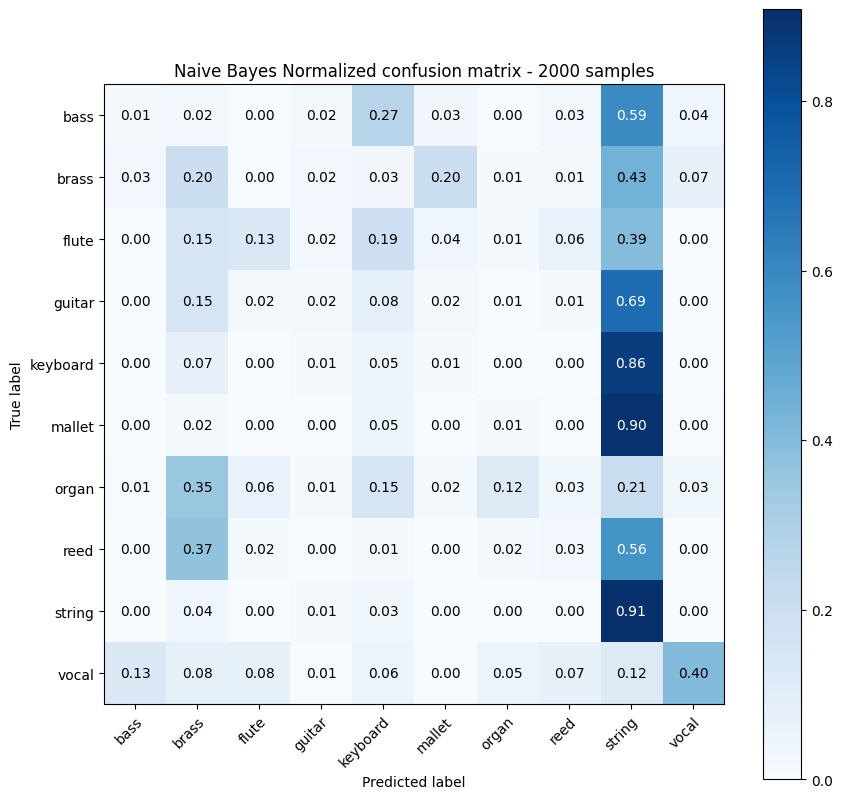

In [20]:
plot_confusion_matrix(y_test, y_pred_NB, classes=class_names, normalize=True,
                      title='Naive Bayes Normalized confusion matrix - 2000 samples')

# Random Forest - Default Hyperparameters

In [ ]:
#instantiate the random forest
clf_Rf =RandomForestClassifier()

In [ ]:
#Train
clf_Rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_RF = clf_Rf.predict(X_test)
accuracy_RF = np.mean(y_pred_RF == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF))

The accuracy of Random Forest is 56.59%


Normalized confusion matrix
[[0.58837485 0.         0.00118624 0.07591934 0.09489917 0.19572954
  0.02491103 0.01542112 0.         0.00355872]
 [0.01858736 0.62081784 0.05204461 0.04089219 0.00743494 0.
  0.         0.02230483 0.00371747 0.23420074]
 [0.04444444 0.00555556 0.76111111 0.         0.01111111 0.02777778
  0.03888889 0.07777778 0.         0.03333333]
 [0.1702454  0.         0.00613497 0.5        0.21625767 0.08588957
  0.01380368 0.00766871 0.         0.        ]
 [0.20365535 0.01958225 0.00261097 0.24543081 0.43994778 0.0613577
  0.01305483 0.         0.00391645 0.01044386]
 [0.14356436 0.01485149 0.         0.04950495 0.1980198  0.58910891
  0.         0.         0.0049505  0.        ]
 [0.07968127 0.0059761  0.03187251 0.         0.0438247  0.04780876
  0.59760956 0.06374502 0.02788845 0.10159363]
 [0.02978723 0.30212766 0.13191489 0.05106383 0.         0.
  0.         0.34468085 0.12765957 0.01276596]
 [0.05555556 0.         0.         0.05882353 0.         0.03267974
 

<Axes: title={'center': 'Random Forest Normalized confusion matrix - 2000 samples'}, xlabel='Predicted label', ylabel='True label'>

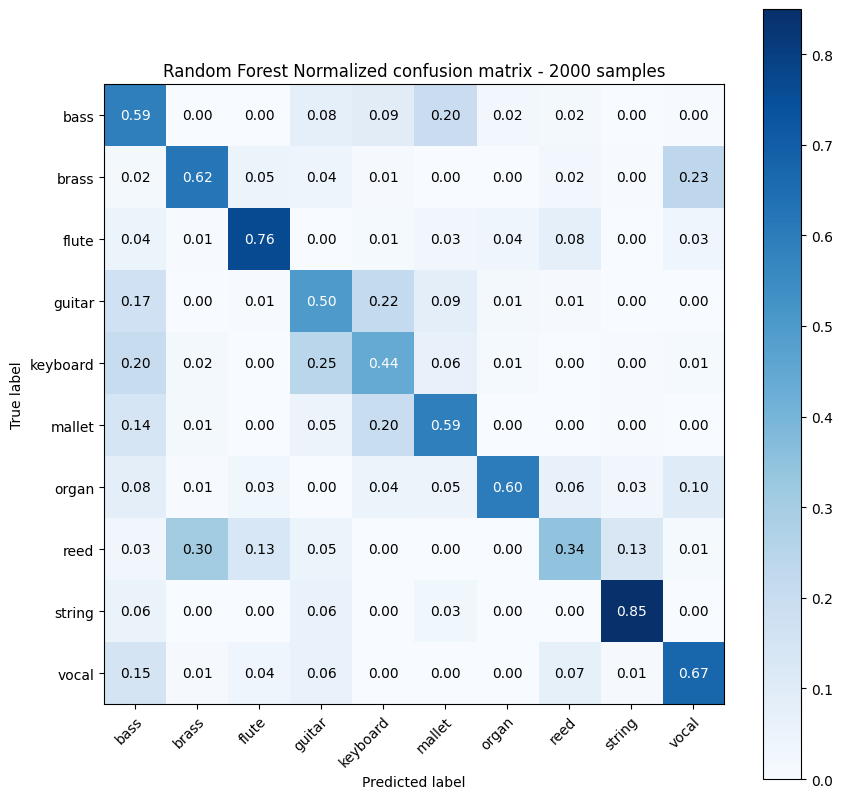

In [ ]:
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names, normalize=True,
                      title='Random Forest Normalized confusion matrix - 2000 samples')

# Random Forest - Random Search

In [ ]:
#instantiate the random forest
clf_Rf_RS=RandomForestClassifier()

In [ ]:
param_rs = {
    "n_estimators" : [32, 64, 128, 256, 512],
    "max_depth": [None, 8, 16, 32, 64],
    "max_features": sp_randint(1, 10),
    "min_samples_split": sp_randint(2, 10),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
    }

In [ ]:
#Random Search
random_search_RF = RandomizedSearchCV(estimator=clf_Rf_RS,
                                      param_distributions=param_rs,
                                      n_iter=15,
                                      cv=5,
                                      n_jobs=-1,
                                      verbose=2)
#Train
random_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 8, 16, 32, 64],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c4bdb891870>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c4bdbb86b60>,
                                        'n_estimators': [32, 64, 128, 256,
                                                         512]},
                   verbose=2)

In [ ]:
random_search_RF.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=6, min_samples_split=5,
                       n_estimators=128)

In [ ]:
print("Random Search Best Parameters:")
print(random_search_RF.best_params_)

Random Search Best Parameters:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_split': 5, 'n_estimators': 128}


In [ ]:
y_pred_RF_random = random_search_RF.predict(X_test)
accuracy_RF_random = np.mean(y_pred_RF_random == y_test)
print("The accuracy of Random Forest - Random Search is {0:.2%}".format(accuracy_RF_random))

The accuracy of Random Forest - Random Search is 56.76%


Normalized confusion matrix
[[0.56820878 0.         0.00118624 0.0688019  0.08303677 0.21233689
  0.04507711 0.01423488 0.00118624 0.0059312 ]
 [0.01858736 0.64312268 0.03717472 0.03717472 0.00371747 0.
  0.         0.01858736 0.00371747 0.23791822]
 [0.07777778 0.00555556 0.63888889 0.01111111 0.00555556 0.02777778
  0.07222222 0.08888889 0.         0.07222222]
 [0.16104294 0.00613497 0.01380368 0.50613497 0.21625767 0.07668712
  0.0107362  0.00766871 0.00153374 0.        ]
 [0.18015666 0.02349869 0.00652742 0.21932115 0.47519582 0.05874674
  0.0156658  0.         0.00913838 0.01174935]
 [0.09405941 0.00990099 0.0049505  0.05940594 0.2029703  0.61881188
  0.         0.00990099 0.         0.        ]
 [0.06573705 0.00199203 0.04183267 0.         0.04581673 0.05577689
  0.5876494  0.06972112 0.04183267 0.08964143]
 [0.01702128 0.30638298 0.11489362 0.06808511 0.         0.00851064
  0.         0.34042553 0.12765957 0.01702128]
 [0.06862745 0.00326797 0.         0.04575163 0.00653595 0.0

<Axes: title={'center': 'Random Forest Randomized Search Normalized confusion matrix - 2000 samples'}, xlabel='Predicted label', ylabel='True label'>

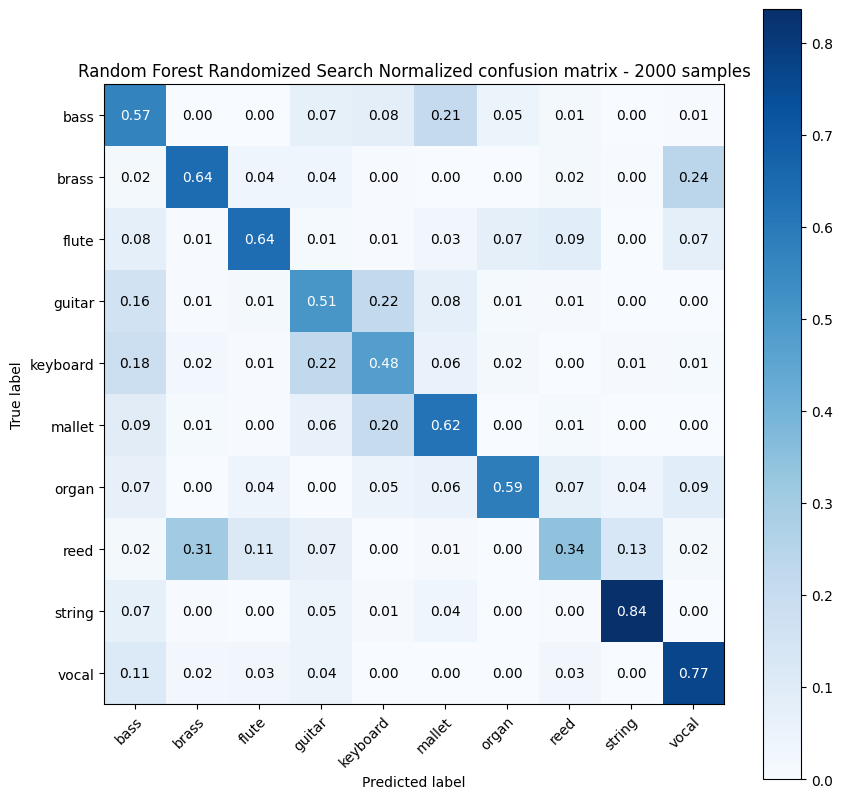

In [ ]:
plot_confusion_matrix(y_test, y_pred_RF_random, classes=class_names, normalize=True,
                      title='Random Forest Randomized Search Normalized confusion matrix - 2000 samples')

# SVM

In [53]:
#Scale and preprocess the data for the SVM
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [54]:
#instatiate the  classifier
SVM = SVC(C = 10)

In [55]:
#Train
SVM.fit(X_train_scaled, y_train)

SVC(C=10)

In [56]:
y_pred_svm = SVM.predict(X_test_scaled)
accuracy_svm = np.mean(y_pred_svm == y_test)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm))

The accuracy of SVMs is 39.60%


Normalized confusion matrix
[[0.28469751 0.00830368 0.04744958 0.09015421 0.22064057 0.19217082
  0.00355872 0.02846975 0.08540925 0.03914591]
 [0.03717472 0.57992565 0.0260223  0.16356877 0.01486989 0.04089219
  0.00371747 0.05204461 0.00743494 0.07434944]
 [0.10555556 0.02222222 0.50555556 0.03888889 0.02777778 0.04444444
  0.07222222 0.16111111 0.01666667 0.00555556]
 [0.08742331 0.18251534 0.06595092 0.17484663 0.24693252 0.04141104
  0.02607362 0.0291411  0.13190184 0.01380368]
 [0.05874674 0.11879896 0.04046997 0.03394256 0.35509138 0.08224543
  0.02610966 0.11096606 0.16579634 0.0078329 ]
 [0.05445545 0.17821782 0.0049505  0.07920792 0.07425743 0.2970297
  0.00990099 0.06435644 0.20792079 0.02970297]
 [0.07171315 0.01394422 0.13944223 0.00796813 0.01394422 0.00996016
  0.53187251 0.0498008  0.01593625 0.14541833]
 [0.01702128 0.36170213 0.12765957 0.         0.00425532 0.00425532
  0.00425532 0.31914894 0.15319149 0.00851064]
 [0.00980392 0.01960784 0.03594771 0.01633987 0.04248

<Axes: title={'center': 'SVM Normalized confusion matrix - 2000 samples'}, xlabel='Predicted label', ylabel='True label'>

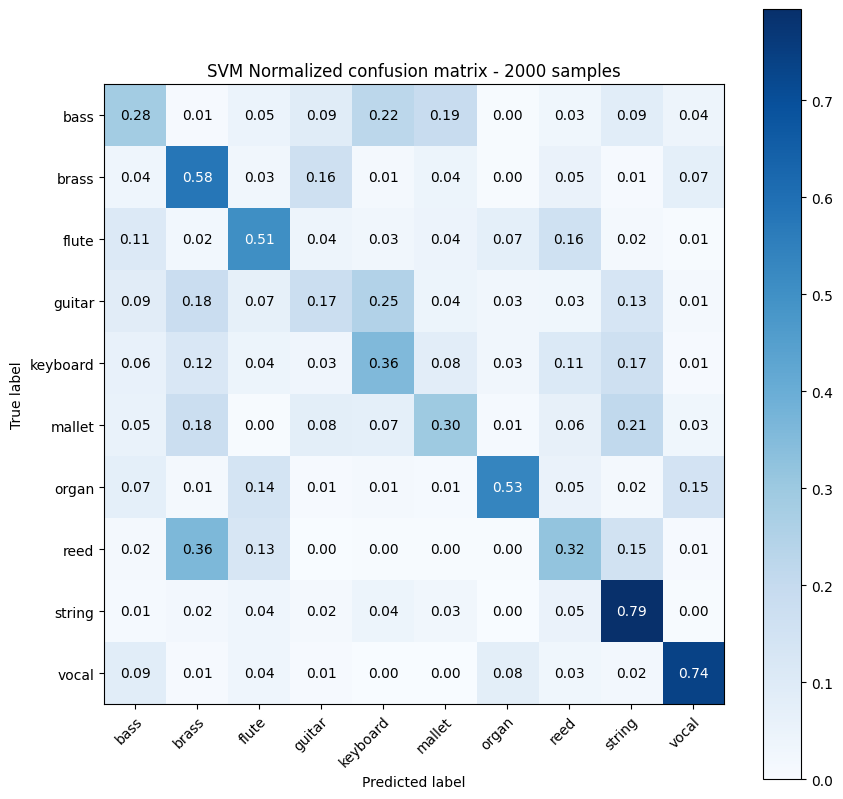

In [57]:
plot_confusion_matrix(y_test, y_pred_svm, classes=class_names, normalize=True,
                      title='SVM Normalized confusion matrix - 2000 samples')